In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif)

# Functions

In [3]:
baseplot.fx <- function(df, x, y, clr, clr_palette, sampletype) {
  if (sampletype == "PBMC") {
    mybreaks <- c(1, 10, 100, 500, 1000, 1500)
  } else {
    mybreaks <- c(1, 10, 50, 100)
  }
  myp <- ggplot(
    df,
    aes(x = eval(as.name(x)), y = eval(as.name(y)))
  ) +
    geom_boxplot() + #
    geom_beeswarm(aes(color = eval(as.name(clr))), cex = 2) +
    scale_color_manual(values = clr_palette) +
    myplot +
    myaxis +
    theme(axis.text.x = element_text(angle = 45, hjust = 1), axis.title.x = element_blank()) +
    annotation_logticks(sides = "l") +
    scale_y_continuous(breaks = log10(mybreaks), labels = mybreaks)
  return(myp)
}


In [4]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [5]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [6]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [7]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [8]:
dim(meta_div)

[1] 773  64

In [9]:
meta_div <- meta_div[ !is.na(meta_div$TRB), ]

In [10]:
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]
meta_div <- meta_div[ meta_div$cancergroup != "LFS", ]

In [11]:
meta_div$log10shann <- log10(meta_div$observed_Shannon)

In [12]:
colnames(meta_div)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "TRB"                "Reads"             
[43] "CPKR"               "Average_reads"      "VMR"               
[46] "Max_reads"          "Singletons"         "Doubletons"        
[49] "qD"                 "Sample_Coverage"    "observed_Richness" 
[52] "estimated_Richness" "SE_Richeness"       "observed_Shannon"  
[55] "estimated_Shannon"  "SE_Shannon"         "observed_Simpson"  
[58] "estimated_Simpson"  "SE_Simpson"         "basename"          
[61] "file"               "Group"              "sampletype"        
[64] "log10shann"

In [13]:
meta_div$cancergroup[ which(meta_div$cancergroup == "Solid")] <- "Solid tumors"

Separate PBMC and cfDNA

In [14]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]

In [15]:
dim(pbmc)

[1] 197  64

In [16]:
names(group_col)[ names(group_col) == "Solid"] <- "Solid tumors"

## rms

In [17]:
pacman::p_load(rms)

In [18]:
dd <- datadist(pbmc[ , c("cycle", "Disease_type", "Age", "log10shann", "cancergroup", "agegroup")])
options(datadist="dd")

In [19]:
options(prType="plain")

In [20]:
f <- ols(log10shann ~ cycle + cancergroup + Age, data = pbmc)


In [21]:
f

Linear Regression Model

ols(formula = log10shann ~ cycle + cancergroup + Age, data = pbmc)

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs     197    LR chi2     24.98    R2       0.119    
sigma0.5705    d.f.            7    R2 adj   0.086    
d.f.    189    Pr(> chi2) 0.0008    g        0.235    

Residuals

     Min       1Q   Median       3Q      Max 
-1.65861 -0.33804  0.01552  0.42141  1.37975 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 1.9673 0.1086 18.11 <0.0001 
cycle=X02                 0.3901 0.1211  3.22 0.0015  
cycle=X03                 0.0768 0.1230  0.62 0.5334  
cycle=X04                 0.1081 0.1367  0.79 0.4301  
cycle=X05                 0.2536 0.1290  1.97 0.0508  
cancergroup=Lymphoma     -0.1823 0.1266 -1.44 0.1517  
cancergroup=Solid tumors -0.1603 0.0930 -1.72 0.0865  
Age                      -0.0160 0.0073 -2.18 0.0306  


In [22]:
anova(f)

,d.f.,Partial SS,MS,F,P
cycle,4,4.177865,1.0444664,3.209377,0.014083563
cancergroup,2,1.248934,0.6244669,1.918826,0.149627706
Age,1,1.545500,1.5454998,4.748924,0.030553492
TOTAL,7,8.316255,1.1880365,3.650531,0.001017093
ERROR,189,61.508562,0.3254421,NA,NA


In [23]:
print(f)

Linear Regression Model

ols(formula = log10shann ~ cycle + cancergroup + Age, data = pbmc)

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs     197    LR chi2     24.98    R2       0.119    
sigma0.5705    d.f.            7    R2 adj   0.086    
d.f.    189    Pr(> chi2) 0.0008    g        0.235    

Residuals

     Min       1Q   Median       3Q      Max 
-1.65861 -0.33804  0.01552  0.42141  1.37975 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 1.9673 0.1086 18.11 <0.0001 
cycle=X02                 0.3901 0.1211  3.22 0.0015  
cycle=X03                 0.0768 0.1230  0.62 0.5334  
cycle=X04                 0.1081 0.1367  0.79 0.4301  
cycle=X05                 0.2536 0.1290  1.97 0.0508  
cancergroup=Lymphoma     -0.1823 0.1266 -1.44 0.1517  
cancergroup=Solid tumors -0.1603 0.0930 -1.72 0.0865  
Age                      -0.0160 0.0073 -2.18 0.0306  



In [24]:
summary(f)

,Low,High,Diff.,Effect,S.E.,Lower 0.95,Upper 0.95,Type
Age,2,14,12,-0.1919902,0.08810112,-0.3657780,-0.01820235,1
cycle - X01:X02,2,1,NA,-0.3901191,0.12110178,-0.6290038,-0.15123427,1
cycle - X03:X02,2,3,NA,-0.3133623,0.12267021,-0.5553409,-0.07138363,1
cycle - X04:X02,2,4,NA,-0.2819937,0.13658150,-0.5514137,-0.01257376,1
cycle - X05:X02,2,5,NA,-0.1364766,0.12908125,-0.3911016,0.11814847,1
cancergroup - Lymphoma:Leukemia,1,2,NA,-0.1822940,0.12664569,-0.4321147,0.06752664,1
cancergroup - Solid tumors:Leukemia,1,3,NA,-0.1603158,0.09303814,-0.3438424,0.02321072,1


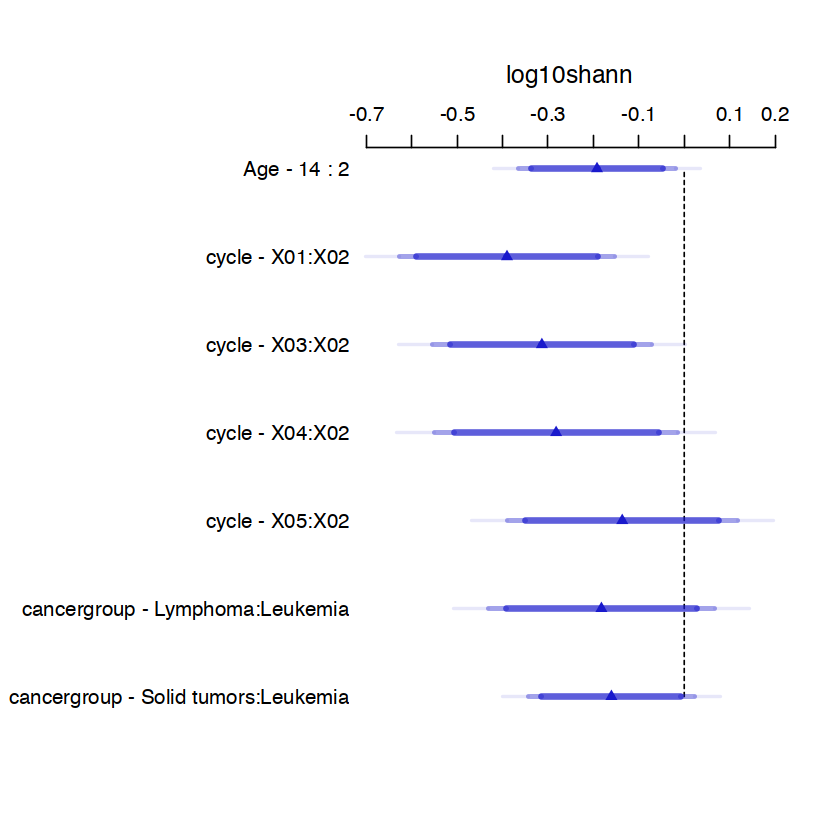

In [25]:
plot(summary(f))


In [26]:
tapply(pbmc$log10shann, pbmc$cycle, summary)

$X01
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.317   1.899   1.744   2.276   2.744 

$X02
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.100   1.768   2.222   2.114   2.457   3.005 

$X03
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2574  1.5030  1.8421  1.8287  2.3662  3.1838 

$X04
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9663  1.4801  1.9081  1.8814  2.2058  2.6821 

$X05
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2907  1.8835  2.0683  2.0368  2.4085  2.7837 


In [27]:
f <- ols(log10shann ~ cycle + cancergroup + agegroup, data = pbmc)
f

Linear Regression Model

ols(formula = log10shann ~ cycle + cancergroup + agegroup, data = pbmc)

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs     197    LR chi2     26.26    R2       0.125    
sigma0.5732    d.f.           10    R2 adj   0.078    
d.f.    186    Pr(> chi2) 0.0034    g        0.240    

Residuals

     Min       1Q   Median       3Q      Max 
-1.65664 -0.34284  0.03434  0.39499  1.28178 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 1.9536 0.1151 16.97 <0.0001 
cycle=X02                 0.4058 0.1225  3.31 0.0011  
cycle=X03                 0.0989 0.1239  0.80 0.4256  
cycle=X04                 0.1317 0.1388  0.95 0.3438  
cycle=X05                 0.2937 0.1309  2.24 0.0260  
cancergroup=Lymphoma     -0.2258 0.1303 -1.73 0.0848  
cancergroup=Solid tumors -0.1465 0.0954 -1.54 0.1263  
agegroup=>= 18 yrs       -0.3438 0.1739 -1.98 0.0495  
agegroup=12-17 yrs       -

## plots for age groups

### PBMC

In [28]:
table(pbmc$agegroup)


  < 2 yrs >= 18 yrs 12-17 yrs   2-4 yrs  5-11 yrs 
       49        16        59        21        52 

In [29]:
pbmc$agegroup <- factor(pbmc$agegroup, levels = c("< 2 yrs", "2-4 yrs", "5-11 yrs", "12-17 yrs", ">= 18 yrs"))

In [30]:
pbmc$Cyclegroup <- NA
pbmc$Cyclegroup[ pbmc$cycle == "X01"] <- "Baseline"
pbmc$Cyclegroup[ pbmc$cycle %in% c("X02", "X03")] <- "Early chemo"
pbmc$Cyclegroup[ pbmc$cycle %in% c("X04", "X05")] <- "Late chemo"

In [31]:
f <- ols(log10shann ~  agegroup + cancergroup, data = pbmc[pbmc$cycle == "X05",])
f


Linear Regression Model

ols(formula = log10shann ~ agegroup + cancergroup, data = pbmc[pbmc$cycle == 
    "X05", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      36    LR chi2      2.44    R2       0.066    
sigma0.5473    d.f.            6    R2 adj  -0.128    
d.f.     29    Pr(> chi2) 0.8751    g        0.147    

Residuals

     Min       1Q   Median       3Q      Max 
-1.61427 -0.22453  0.05415  0.35186  0.87877 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 2.0621 0.1891 10.90 <0.0001 
agegroup=2-4 yrs          0.2069 0.3169  0.65 0.5190  
agegroup=5-11 yrs        -0.0088 0.2451 -0.04 0.9715  
agegroup=12-17 yrs        0.1637 0.3080  0.53 0.5991  
agegroup=>= 18 yrs        0.1316 0.4561  0.29 0.7750  
cancergroup=Lymphoma     -0.3211 0.3107 -1.03 0.3099  
cancergroup=Solid tumors -0.1483 0.2249 -0.66 0.5150  


In [32]:
annotation_df <- data.frame(
  cycle = c("X01"),
  start = c("< 2 yrs"),
  end = c("12-17 yrs"),
  y = c(3),
  label = c("p = 0.04") )

In [33]:
p_pbmc <- baseplot.fx(pbmc, "agegroup", "log10shann", "cancergroup", group_col, "PBMC")

Warning message in geom_signif(data = annotation_df, aes(xmin = start, xmax = end, :
“Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position”


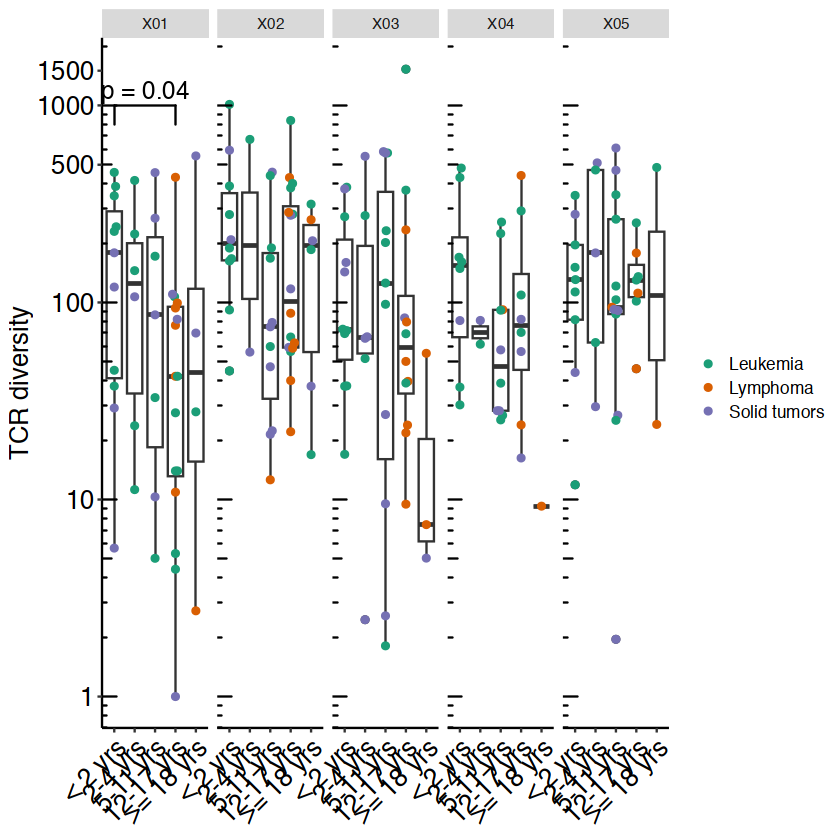

In [34]:
p_pbmc <- p_pbmc + geom_signif(
    data = annotation_df,
    aes(xmin = start, xmax = end, annotations = label, y_position = y),
    textsize = 5, vjust = 0,
    manual = TRUE
  ) +
facet_wrap(~cycle, nrow = 1) + 
labs( y = "TCR diversity")

p_pbmc

In [35]:
pdf(paste0(plotpath, "pbmc_shann_age_facet_cycle.pdf"), width = 12, height = 6)
p_pbmc + theme(legend.position = "bottom")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5))
dev.off()

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


pdf 
  2

### cfDNA

In [36]:
table(cfdna$agegroup)


  < 2 yrs >= 18 yrs 12-17 yrs   2-4 yrs  5-11 yrs 
       49        25        77        45        70 

In [37]:
cfdna$agegroup <- factor(cfdna$agegroup, levels = c("< 2 yrs", "2-4 yrs", "5-11 yrs", "12-17 yrs", ">= 18 yrs"))

In [38]:
cfdna$Cyclegroup <- NA
cfdna$Cyclegroup[ cfdna$cycle == "X01"] <- "Baseline"
cfdna$Cyclegroup[ cfdna$cycle %in% c("X02", "X03")] <- "Early chemo"
cfdna$Cyclegroup[ cfdna$cycle %in% c("X04", "X05")] <- "Late chemo"

In [39]:
f <- ols(log10shann ~  agegroup + cancergroup, data = cfdna[cfdna$cycle == "X04",])
f


Linear Regression Model

ols(formula = log10shann ~ agegroup + cancergroup, data = cfdna[cfdna$cycle == 
    "X04", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      50    LR chi2     12.50    R2       0.221    
sigma0.4556    d.f.            6    R2 adj   0.113    
d.f.     43    Pr(> chi2) 0.0517    g        0.258    

Residuals

      Min        1Q    Median        3Q       Max 
-1.056772 -0.350704  0.007409  0.267044  1.219000 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 1.0568 0.1556  6.79 <0.0001 
agegroup=2-4 yrs         -0.2058 0.2289 -0.90 0.3736  
agegroup=5-11 yrs        -0.4497 0.2005 -2.24 0.0301  
agegroup=12-17 yrs       -0.3285 0.2055 -1.60 0.1172  
agegroup=>= 18 yrs       -0.2911 0.2779 -1.05 0.3007  
cancergroup=Lymphoma     -0.3166 0.1851 -1.71 0.0944  
cancergroup=Solid tumors -0.2252 0.1518 -1.48 0.1453  


In [40]:
annotation_df <- data.frame(
  cycle = c("X02", "X02", "X03", "X03", "X04"),
  start = rep("< 2 yrs", 5),
  end = c("2-4 yrs", ">= 18 yrs","5-11 yrs", ">= 18 yrs","5-11 yrs"),
  y = c(1.7, 1.9, 2.1, 2.3, 2.3),
  label = c("p = 0.05", "p = 0.004", "p = 0.01", "p = 0.05", "p = 0.03"))

In [41]:
p_cfdna <- baseplot.fx(cfdna, "agegroup", "log10shann", "cancergroup", group_col, "cfDNA")

Warning message in geom_signif(data = annotation_df, aes(xmin = start, xmax = end, :
“Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position”


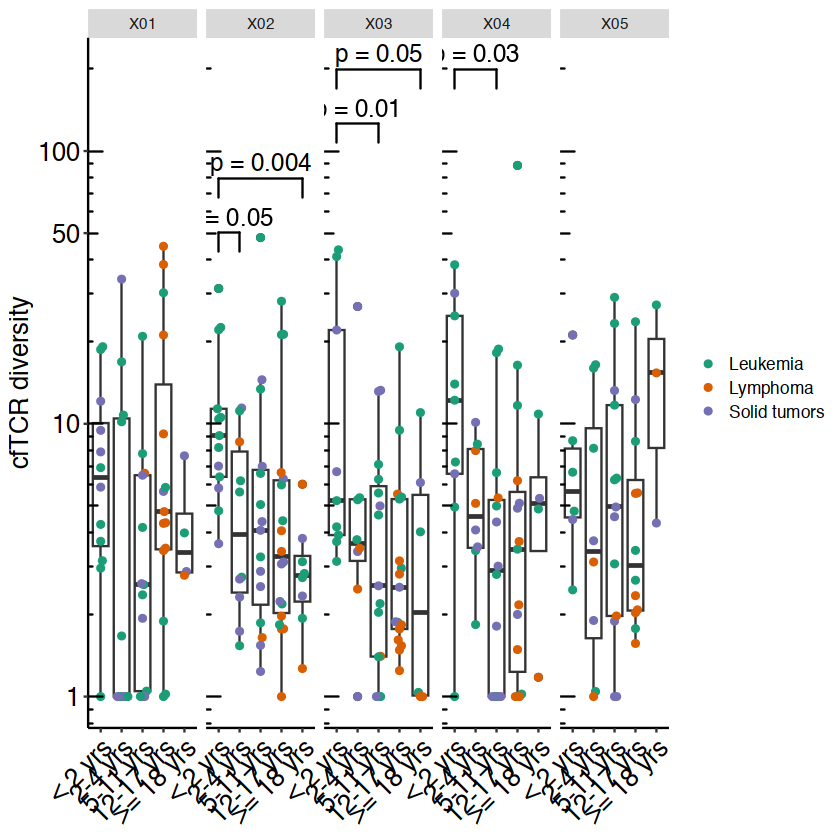

In [42]:
p_cfdna <- p_cfdna + geom_signif(
    data = annotation_df,
    aes(xmin = start, xmax = end, annotations = label, y_position = y),
    textsize = 5, vjust = 0,
    manual = TRUE
  ) +
facet_wrap(~cycle, nrow = 1) + 
labs( y = "cfTCR diversity")

p_cfdna

In [43]:
pdf(paste0(plotpath, "cfdna_shann_age_facet_cycle.pdf"), width = 12, height = 6)
p_cfdna + theme(legend.position = "bottom")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5))
dev.off()

pdf 
  2

## Plots for cancer groups

### PBMC

In [44]:
f <- ols(log10shann ~  cancergroup + Age, data = pbmc[pbmc$cycle == "X05",])
f

Linear Regression Model

ols(formula = log10shann ~ cancergroup + Age, data = pbmc[pbmc$cycle == 
    "X05", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      36    LR chi2      1.42    R2       0.039    
sigma0.5284    d.f.            3    R2 adj  -0.052    
d.f.     32    Pr(> chi2) 0.7017    g        0.114    

Residuals

      Min        1Q    Median        3Q       Max 
-1.692334 -0.187964 -0.002642  0.320536  0.796088 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 2.0915 0.1658 12.61 <0.0001 
cancergroup=Lymphoma     -0.2915 0.3033 -0.96 0.3438  
cancergroup=Solid tumors -0.1500 0.1991 -0.75 0.4566  
Age                       0.0046 0.0192  0.24 0.8117  


In [45]:
# annotation_df <- data.frame(
#   Cyclegroup = "Early chemo",
#   start = c("Leukemia","Leukemia"),
#   end = c("Lymphoma","Solid tumors"),
#   y = c(3.3,3.5),
#   label = c("p = 0.03", "p = 0.05") )

In [46]:
p_pbmc <- baseplot.fx(pbmc, "cancergroup", "log10shann", "cycle", rep("grey",5), "PBMC")

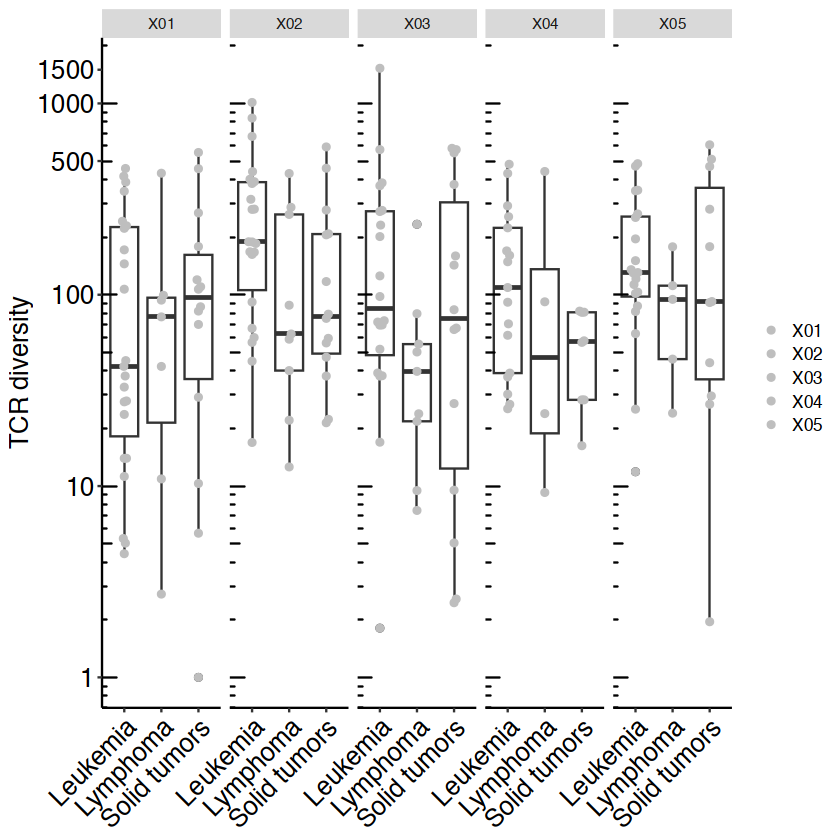

In [47]:
p_pbmc <- p_pbmc + 
# geom_signif(
#     data = annotation_df,
#     aes(xmin = start, xmax = end, annotations = label, y_position = y),
#     textsize = 5, vjust = 0, tip_length = 0.01,
#     manual = TRUE
#   ) +
facet_wrap(~cycle, nrow = 1) + 
labs( y = "TCR diversity")

p_pbmc

In [48]:
pdf(paste0(plotpath, "pbmc_shann_cancergroup_facet.pdf"), width = 12, height = 6)
p_pbmc + theme(legend.position = "none")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5))
dev.off()

pdf 
  2

### cfDNA

In [49]:
f <- ols(log10shann ~  cancergroup + Age, data = cfdna[cfdna$cycle == "X05",])
f

Linear Regression Model

ols(formula = log10shann ~ cancergroup + Age, data = cfdna[cfdna$cycle == 
    "X05", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      42    LR chi2      7.98    R2       0.173    
sigma0.4030    d.f.            3    R2 adj   0.108    
d.f.     38    Pr(> chi2) 0.0465    g        0.205    

Residuals

     Min       1Q   Median       3Q      Max 
-0.77753 -0.28513  0.02004  0.25927  0.79551 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 0.7730 0.1234  6.26 <0.0001 
cancergroup=Lymphoma     -0.4408 0.1643 -2.68 0.0108  
cancergroup=Solid tumors -0.2534 0.1473 -1.72 0.0935  
Age                       0.0116 0.0118  0.98 0.3310  


In [50]:
annotation_df <- data.frame(
  cycle = c("X01","X02", "X02", "X03", "X05"),
  start = c("Leukemia","Leukemia", "Leukemia","Leukemia", "Leukemia"),
  end = c("Lymphoma", "Lymphoma", "Solid tumors", "Lymphoma","Lymphoma"),
  y = c(2, 2, 2.2, 2, 2.2),
  label = c("p = 0.04", "p = 0.02", "p = 0.008", "p = 0.02", "p = 0.01") )

In [51]:
p_cfdna <- baseplot.fx(cfdna, "cancergroup", "log10shann", "cycle", rep("grey",5), "cfDNA")

Warning message in geom_signif(data = annotation_df, aes(xmin = start, xmax = end, :
“Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position”


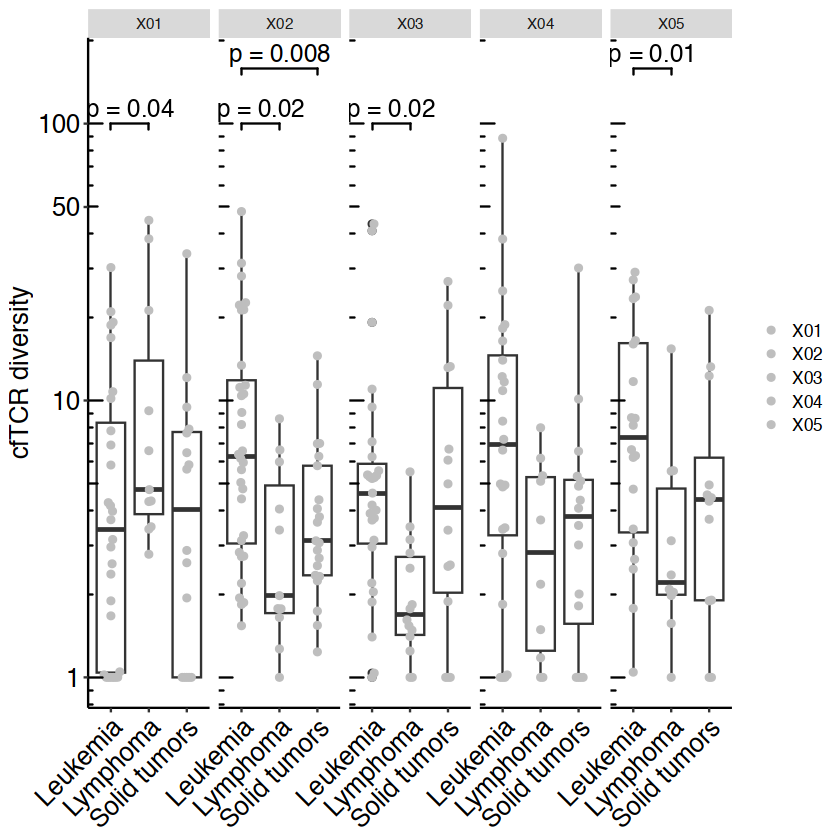

In [52]:
p_cfdna <- p_cfdna + geom_signif(
    data = annotation_df,
    aes(xmin = start, xmax = end, annotations = label, y_position = y),
    textsize = 5, vjust = 0, tip_length = 0.01,
    manual = TRUE
  ) +
facet_wrap(~cycle, nrow = 1) + 
labs( y = "cfTCR diversity")

p_cfdna

In [53]:
pdf(paste0(plotpath, "cfdna_shann_cancergroup_facet.pdf"), width = 12, height = 6)
p_cfdna + theme(legend.position = "none")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5))
dev.off()

pdf 
  2